In [0]:
#property excersise
import numpy as np
import pandas as pd

# import visuvalization
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#import linear
from sklearn.linear_model import LinearRegression

#import train test
from sklearn.model_selection import train_test_split

#import metrics
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics
from scipy import stats


In [0]:
pro= pd.read_csv("houseprice.csv")
pro.shape

(21597, 21)

In [0]:
pro.head()

id        date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014  221900         3       1.00         1180      5650   
1  6414100192   12/9/2014  538000         3       2.25         2570      7242   
2  5631500400   2/25/2015  180000         2       1.00          770     10000   
3  2487200875   12/9/2014  604000         4       3.00         1960      5000   
4  1954400510   2/18/2015  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [0]:
pro.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

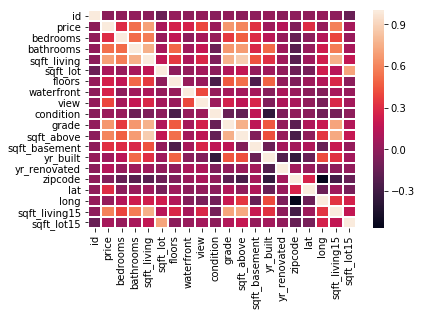

In [0]:
sb.heatmap(pro.corr(), linewidth=1)

In [0]:
pro.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.002727  0.266398 -0.006834   0.063744     0.103854  0.021632   
view           0.011536  0.397370  0.080008   0.188386     0.284709  0.074900   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.005193  0.323799  0.302808   0.283440     0.435130  0.015418   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.016925  0.126424  0.018389   0.050544     0.055308  0.007686   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.002727  0.011536  -0.023803  0.008188   
price          0.256804    0.266398  0.397370   0.036056  0.667951   
bedrooms       0.177944   -0.006834  0.080008   0.026496  0.356563   
bathrooms      0.502582    0.063744  0.188386  -0.126479  0.665838   
sqft_living    0.353953    0.103854  0.284709  -0.059445  0.762779   
sqft_lot      -0.004814    0.021632  0.074900  -0.008830  0.114731   
floors         1.000000    0.023755  0.028814  -0.264075  0.458794   
waterfront     0.023755    1.000000  0.401971   0.016611  0.082888   
view           0.028814    0.401971  1.000000   0.045999  0.251728   
condition     -0.264075    0.016611  0.045999   1.000000 -0.146896   
grade          0.458794    0.082888  0.251728  -0.146896  1.000000   
sqft_above     0.523989    0.072109  0.167609  -0.158904  0.756073   
sqft_basement -0.245715    0.080559  0.277078   0.173849  0.168220   
yr_built       0.489193   -0.026153 -0.053636  -0.361592  0.447865   
yr_renovated   0.006427    0.092873  0.103951  -0.060788  0.014261   
zipcode       -0.059541    0.030272  0.084622   0.002888 -0.185771   
lat            0.049239   -0.014306  0.005871  -0.015102  0.113575   
long           0.125943   -0.041904 -0.078107  -0.105877  0.200341   
sqft_living15  0.280102    0.086507  0.280681  -0.093072  0.713867   
sqft_lot15    -0.010722    0.030781  0.072904  -0.003126  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799      -0.005193  0.021617     -0.016925 -0.008211   
price            0.605368       0.323799  0.053953      0.126424 -0.053402   
bedrooms         0.479386       0.302808  0.155670      0.018389 -0.154092   
bathrooms        0.686668       0.283440  0.507173      0.050544 -0.204786   
sqft_living      0.876448       0.435130  0.318152      0.055308 -0.199802   
sqft_lot         0.184139       0.015418  0.052946      0.007686 -0.129586   
floors           0.523989      -0.245715  0.489193      0.006427 -0.059541   
waterfront       0.072109       0.080559 -0.026153      0.092873  0.030272   
view             0.167609       0.277078 -0.053636      0.103951  0.084622   
condition       -0.158904       0.173849 -0.361592     -0.060788  0.

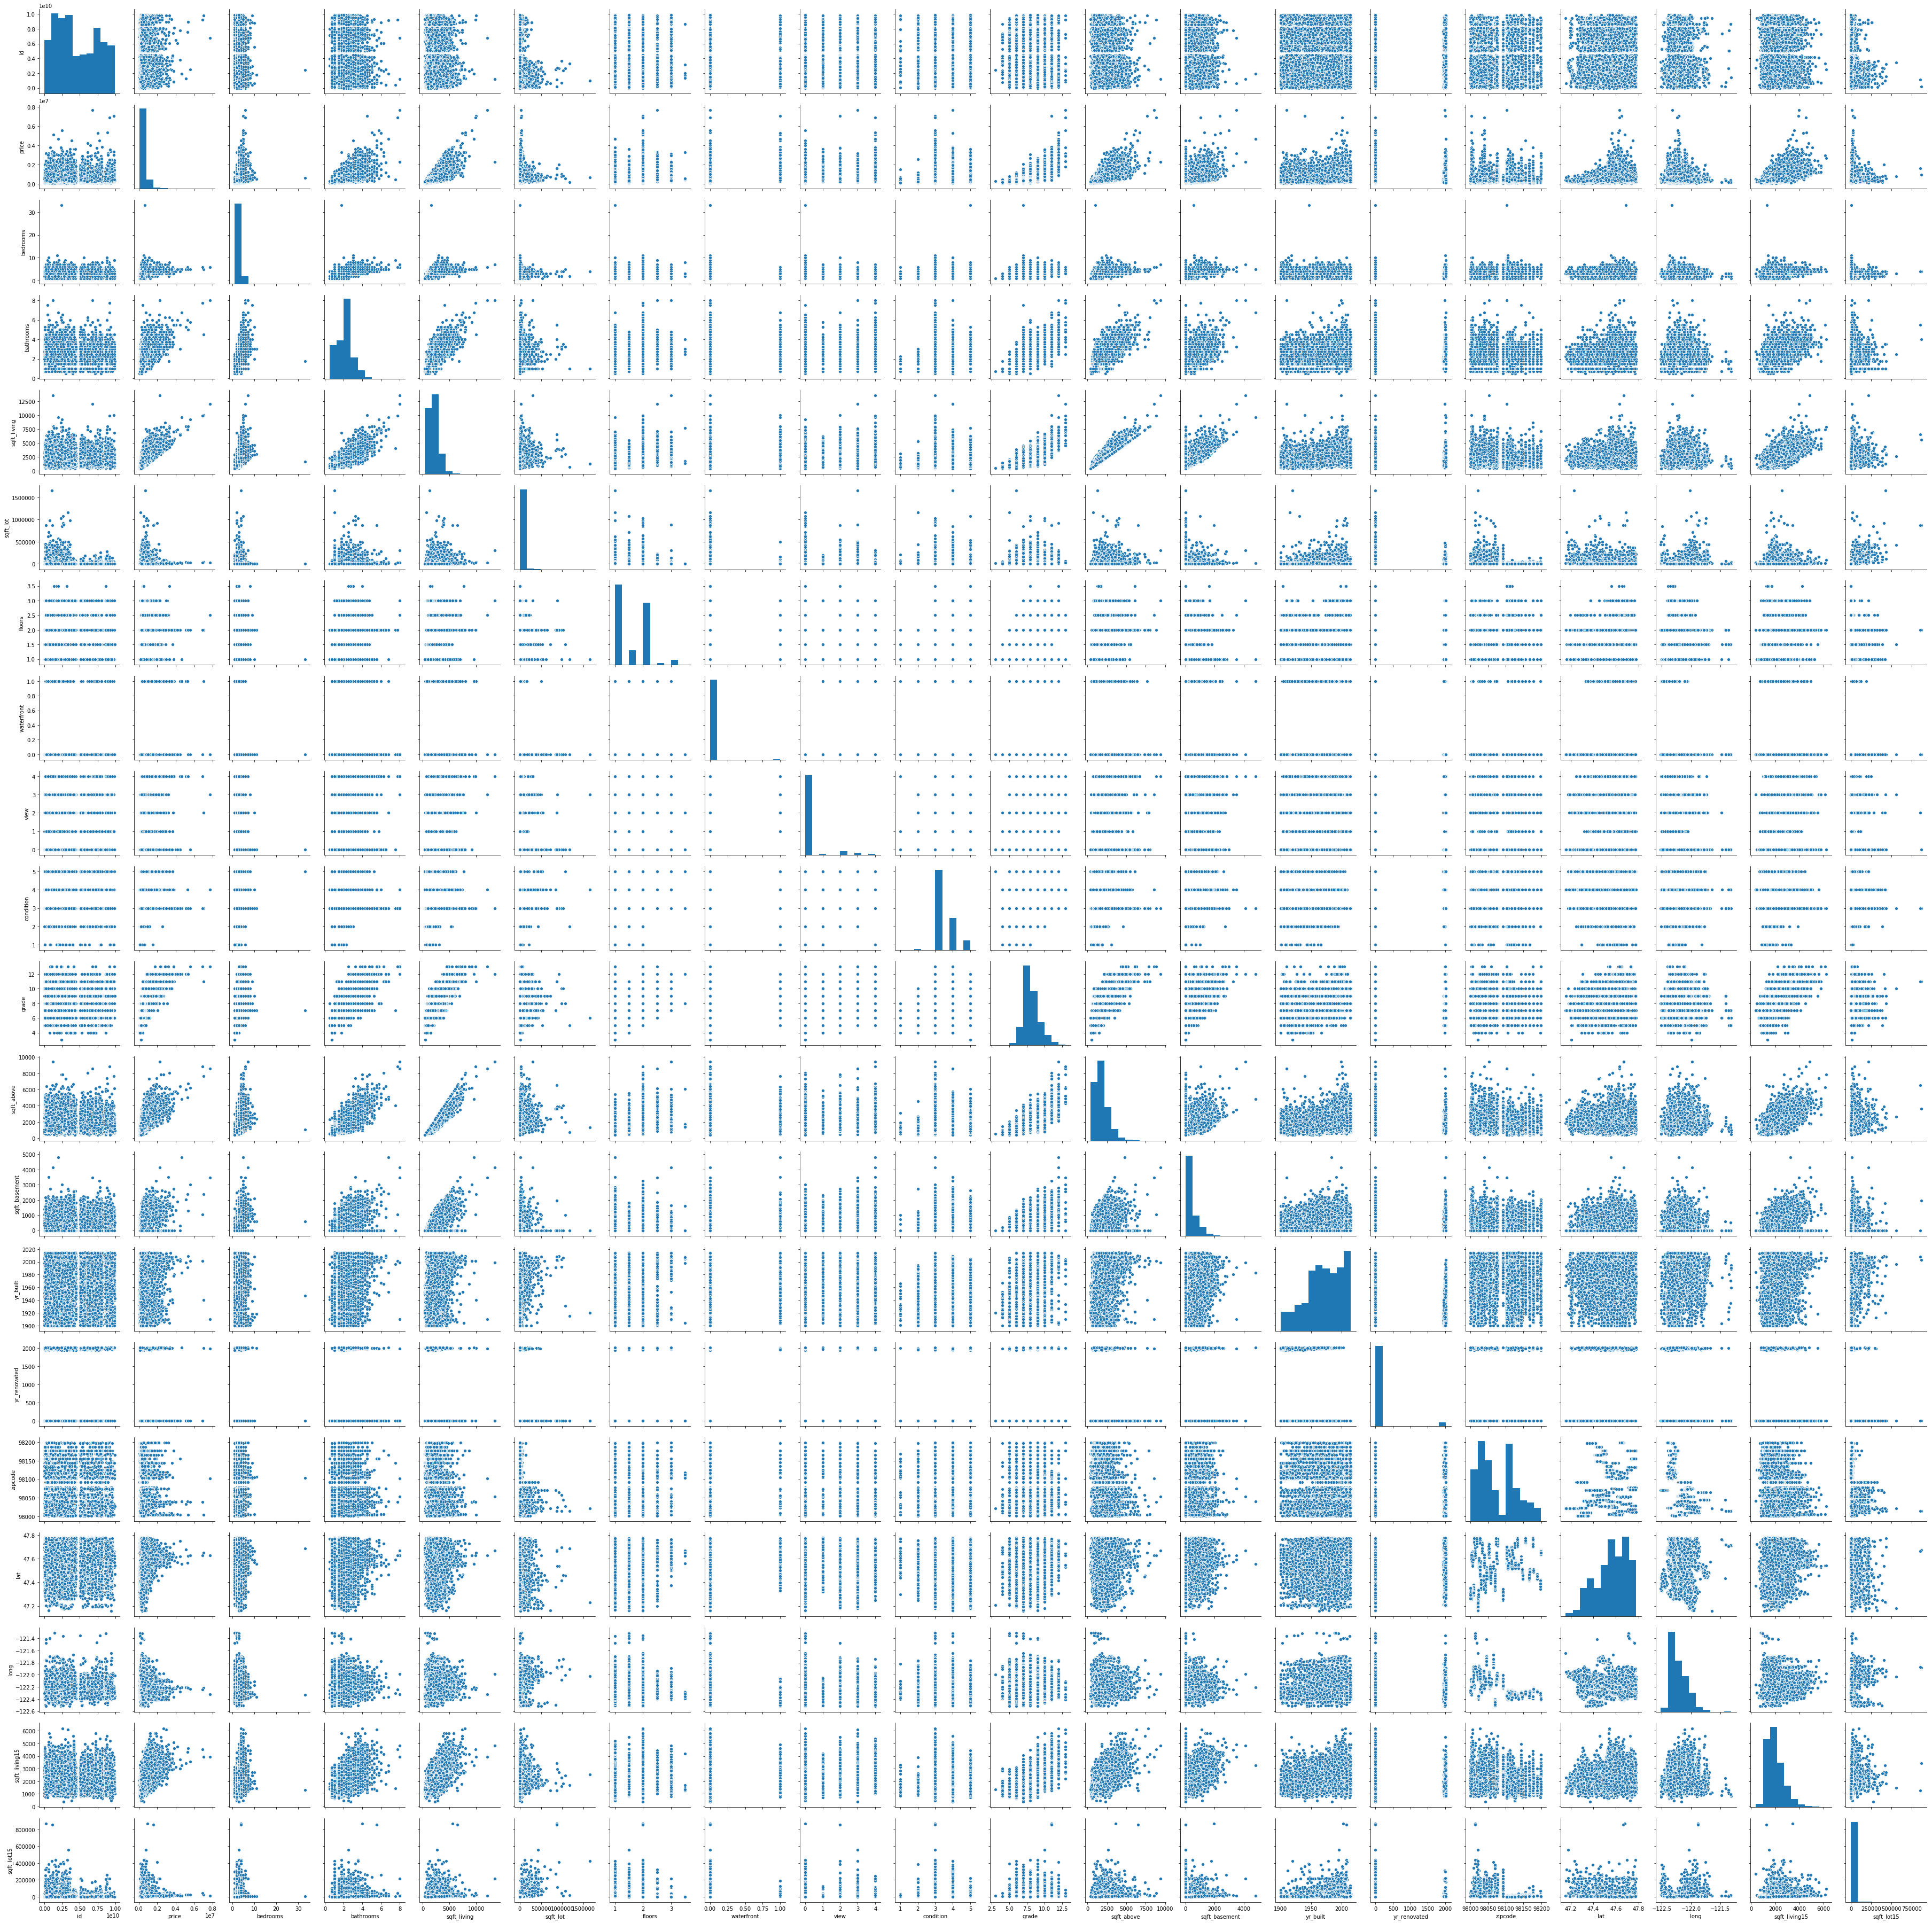

In [0]:
sb.pairplot(pro)

In [0]:
pro1= pro.loc[:,('price','bedrooms','bathrooms','sqft_living','grade','condition','sqft_above','sqft_lot','sqft_living15','waterfront','view')]

In [0]:
pro1

price  bedrooms  bathrooms  sqft_living  grade  condition  \
0       221900         3       1.00         1180      7          3   
1       538000         3       2.25         2570      7          3   
2       180000         2       1.00          770      6          3   
3       604000         4       3.00         1960      7          5   
4       510000         3       2.00         1680      8          3   
5      1230000         4       4.50         5420     11          3   
6       257500         3       2.25         1715      7          3   
7       291850         3       1.50         1060      7          3   
8       229500         3       1.00         1780      7          3   
9       323000         3       2.50         1890      7          3   
10      662500         3       2.50         3560      8          3   
11      468000         2       1.00         1160      7          4   
12      310000         3       1.00         1430      7          4   
13      400000         3       1.75         1370      7          4   
14      530000         5       2.00         1810      7          3   
15      650000         4       3.00         2950      9          3   
16      395000         3       2.00         1890      7          3   
17      485000         4       1.00         1600      7          4   
18      189000         2       1.00         1200      7          4   
19      230000         3       1.00         1250      7          4   
20      385000         4       1.75         1620      7          4   
21     2000000         3       2.75         3050      9          3   
22      285000         5       2.50         2270      8          3   
23      252700         2       1.50         1070      7          3   
24      329000         3       2.25         2450      8          4   
25      233000         3       2.00         1710      6          5   
26      937000         3       1.75         2450      8          3   
27      667000         3       1.00         1400      8          5   
28      438000         3       1.75         1520      7          3   
29      719000         4       2.50         2570      8          3   
...        ...       ...        ...          ...    ...        ...   
21567   399950         2       1.00          710      7          4   
21568   380000         3       2.50         1260      7          3   
21569   270000         3       2.50         1870      7          3   
21570   505000         2       2.50         1430      8          3   
21571   385000         3       2.50         1520      8          3   
21572   414500         2       1.50         1210      8          3   
21573   347500         3       2.50         2540      8          3   
21574  1220000         4       3.50         4910     11          3   
21575   572000         4       2.75         2770      8          3   
21576   475000         3       2.25         1190      8          3   
21577  1090000         5       3.75         4170     10          3   
21578   350000         4       2.75         2500      8          3   
21579   520000         2       2.25         1530      8          3   
21580   679950         5       2.75         3600      9          3   
21581  1580000         4       3.25         3410     10          3   
21582   541800         4       2.50         3118      9          3   
21583   810000         4       3.00         3990      9          3   
21584  1540000         5       3.75         4470     11          3   
21585   467000         3       2.50         1425      8          3   
21586   224000         3       1.75         1500      6          3   
21587   507250         3       2.50         2270      8          3   
21588   429000         3       2.00         1490      8          3   
21589   610685         4       2.50         2520      9          3   
21590  1010000         4       3.50         3510      9          3   
21591   475000         3       2.50         1310      8          3   
21592   360000     

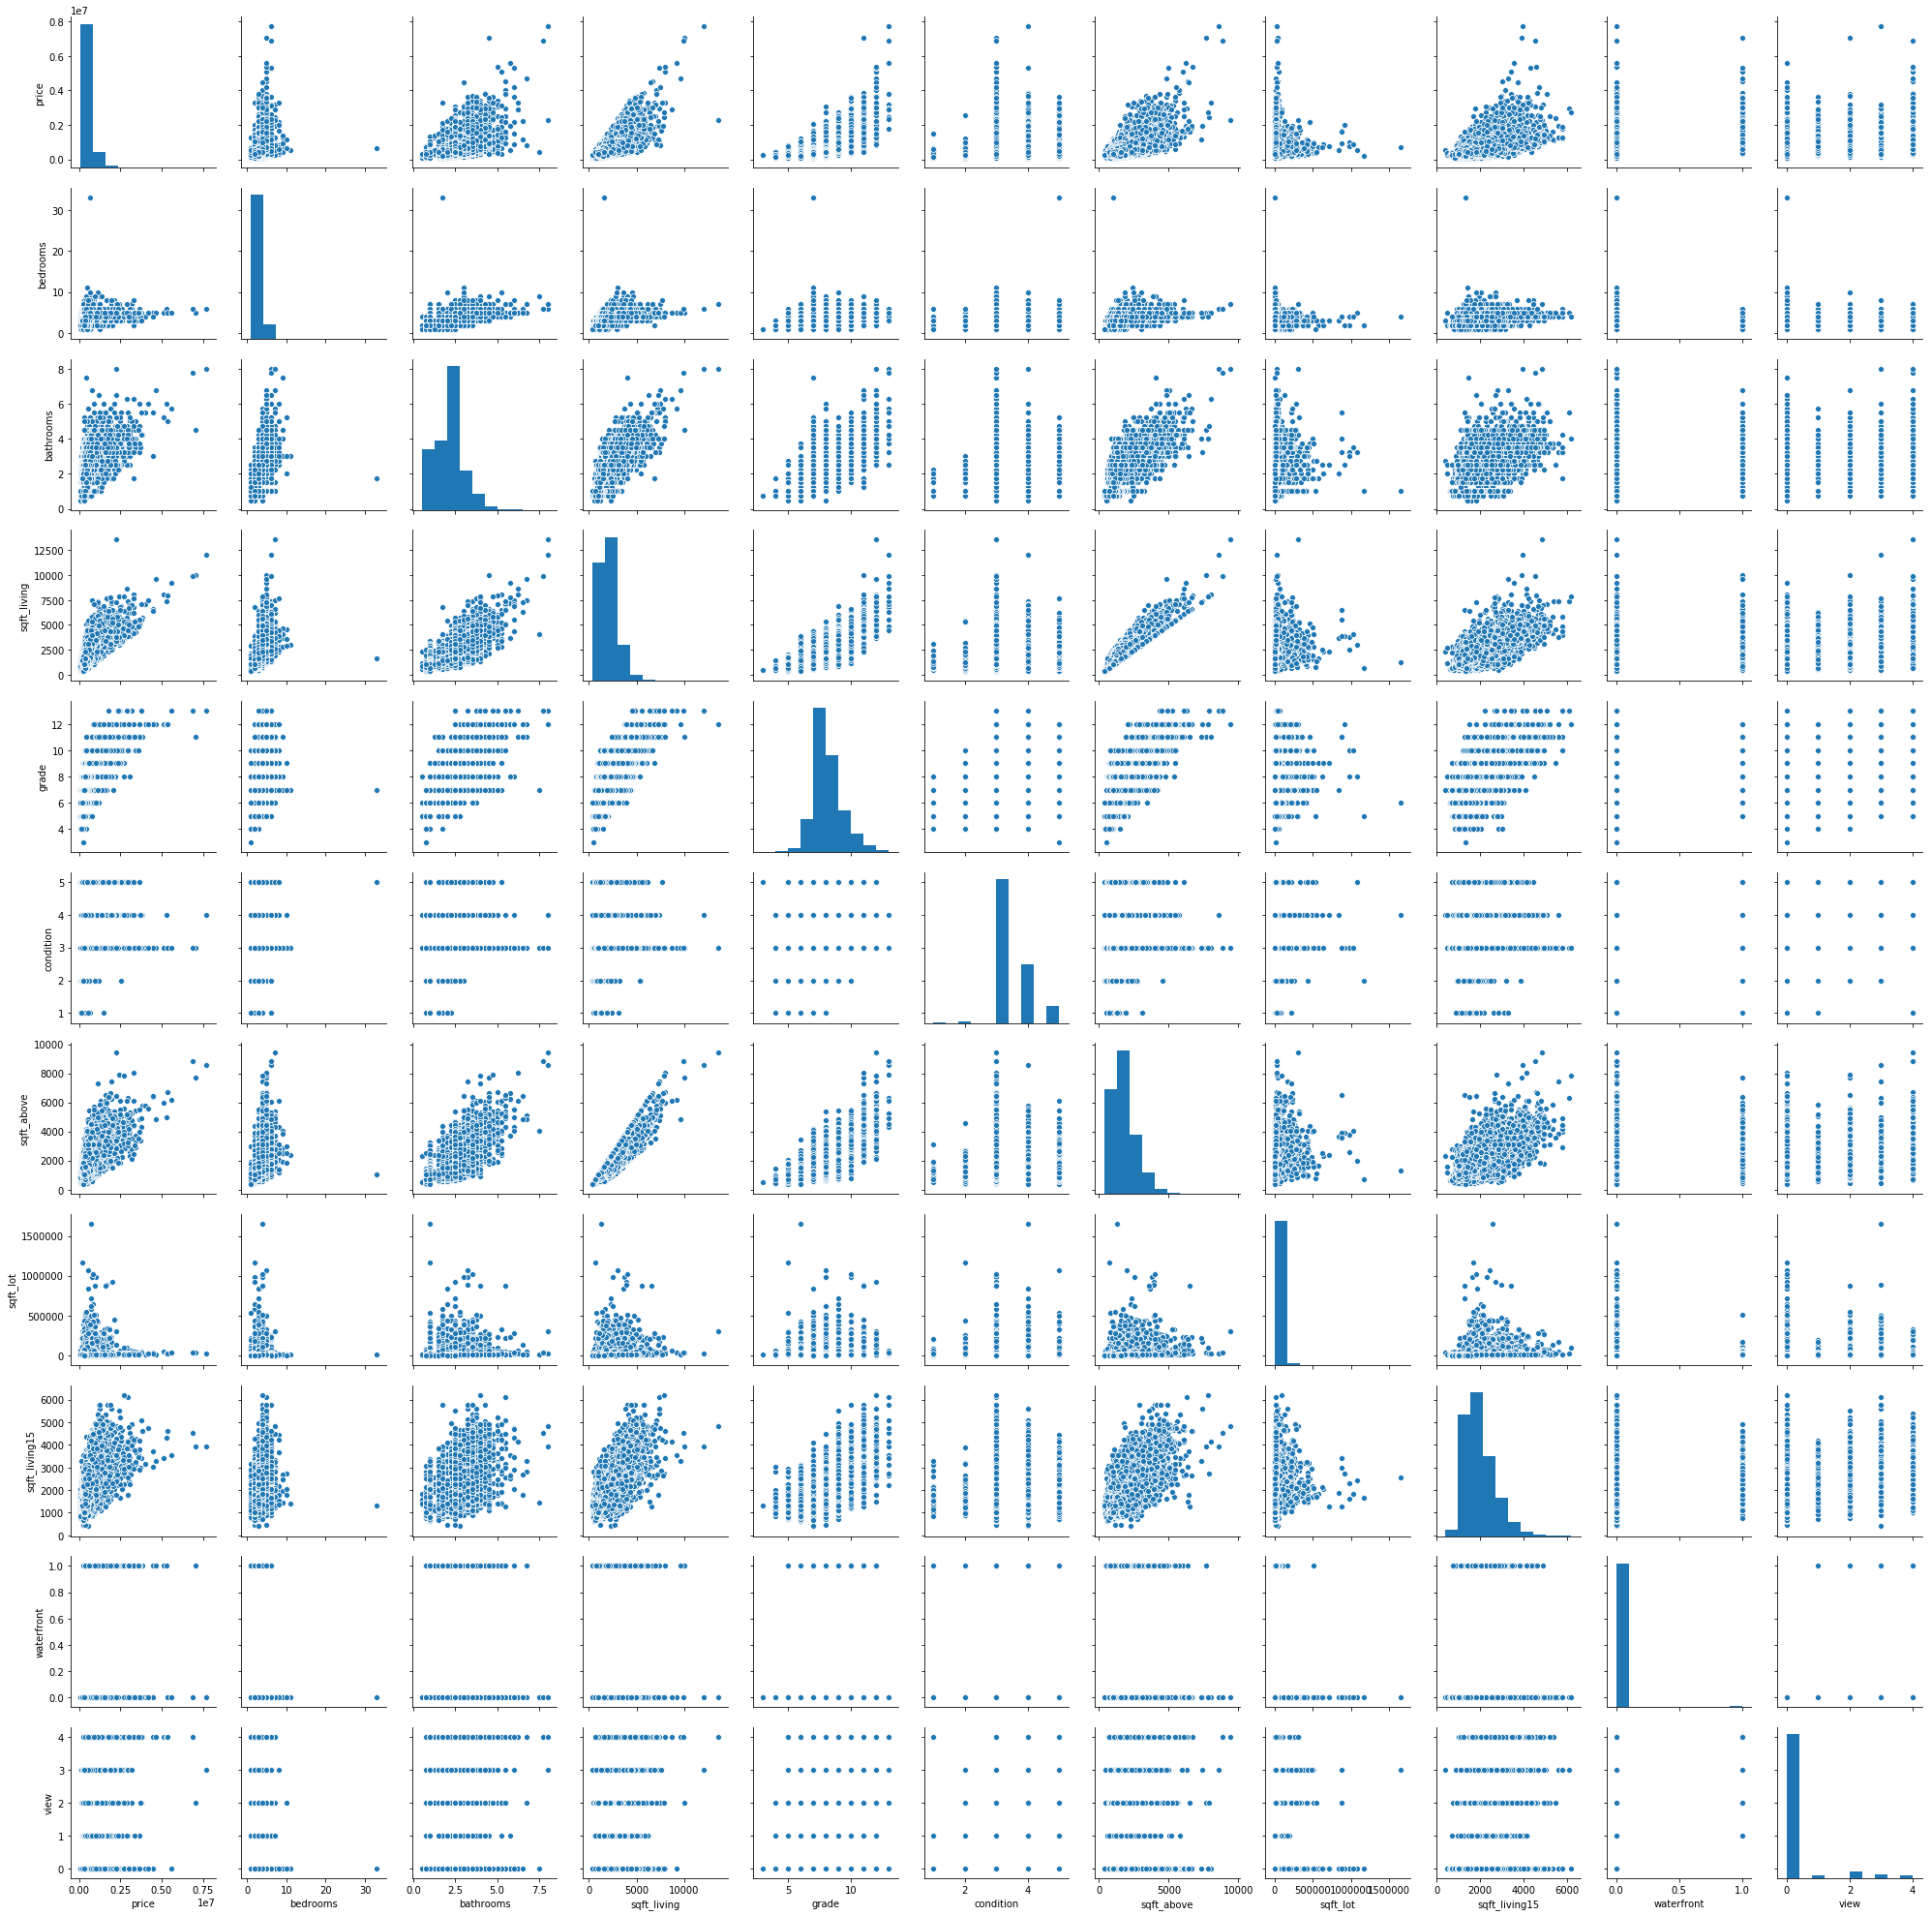

In [0]:
sb.pairplot(pro1)

In [0]:
#sb.distplot(pro1.price)
print("Range of Skewness, S < |1.96|")

print("Skewness of sqft: ",stats.skew(pro1.sqft_living))
print("Skewness of bed: ",stats.skew(pro1.bedrooms))
print("Skewness of bath: ",stats.skew(pro1.bathrooms))
print("Skewness of grade: ",stats.skew(pro1.grade))
print("Skewness of sqft_living15: ",stats.skew(pro1.sqft_living15))

print("Kurtosis of sqft: ",stats.kurtosis(pro1.sqft_living))
print("Kurtosis of bed: ",stats.kurtosis(pro1.bedrooms))

Range of Skewness, S < |1.96|
Skewness of sqft:  1.4731131326116373
Skewness of bed:  2.0235006824707016
Skewness of bath:  0.5196731850083088
Skewness of grade:  0.7881818890694129
Skewness of sqft_living15:  1.1067985186085634
Kurtosis of sqft:  5.2506082929452305
Kurtosis of bed:  49.81002325740027


In [0]:
X=pro1.loc[:,('bedrooms','sqft_living','grade','condition','sqft_above','sqft_lot','sqft_living15','waterfront')]
y=pro1.price

In [0]:
X.shape

(21597, 8)

In [0]:
y.shape

(21597,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=14)

In [0]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (17277, 8)
X_test shape (4320, 8)
y_train shape (17277,)
y_test shape (4320,)


In [0]:
model_lr= LinearRegression()

In [0]:
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_predict= model_lr.predict(X_test)

In [0]:
r2_score(y_test,y_predict)

0.6144693575157687

In [0]:
y_predict

array([361025.11051975, 502477.61656894, 333725.07786679, ...,
       450301.08884343, 581905.81434541, 554374.94916895])

In [0]:
y_test

7084      482000
13347     530000
14187     418000
16244    2330000
4742      260000
3692      350000
5898      416500
1408      685000
15172     374000
18823     540000
8446      340000
4089      845000
14546     330000
20516     550000
16457     340000
1585      453500
12105     585000
3363      242500
5635      480000
20460     375000
3938      675000
10740     200000
18501     849000
6815      347000
17524     425000
21233     494000
14255     130000
3181      249000
14365     489000
9625      290000
          ...   
14773     250000
2712      273000
431       988000
1467      652000
1076      356700
15394     398000
15578    1680000
977       216000
10212     535000
71        325000
8354      587000
13698     440000
7301      798000
1404      300000
11768     289950
12487     375950
1938      240000
1476      235000
12186     260000
13712     766000
2247      280005
8085     4670000
19053    1420000
10075     475000
11941     940000
10845     275000
11062     499990
4968      3850

In [0]:
predictions = model_lr.predict(X_test)

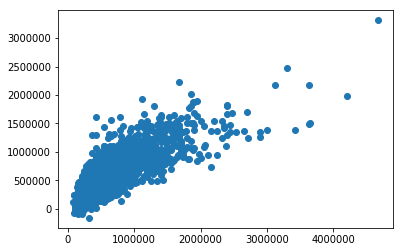

In [0]:
plt.scatter(y_test, predictions)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 151807.48556611512
MSE: 50523962240.500565
RMSE: 224775.3595047744


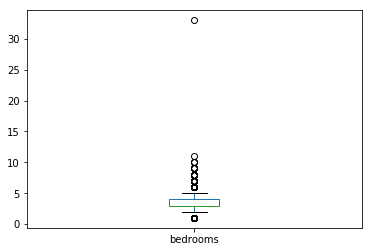

In [0]:

pro.bedrooms.plot(kind='box')

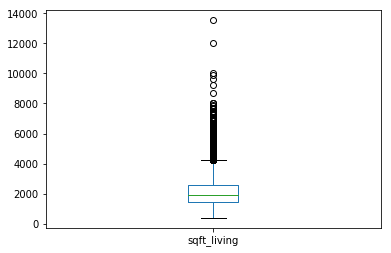

In [0]:
pro.sqft_living.plot(kind='box')